# ***Quora Question Pairs Similarity Detection***

<h1> 1. Business Problem </h1>

<h2> 1.1 Description </h2>

<p>Quora is a place to gain and share knowledge—about anything. It’s a platform to ask questions and connect with people who contribute unique insights and quality answers. This empowers people to learn from each other and to better understand the world.</p>
<p>
Over 100 million people visit Quora every month, so it's no surprise that many people ask similarly worded questions. Multiple questions with the same intent can cause seekers to spend more time finding the best answer to their question, and make writers feel they need to answer multiple versions of the same question. Quora values canonical questions because they provide a better experience to active seekers and writers, and offer more value to both of these groups in the long term.
</p>
<br>
> Credits: Kaggle 


__ Problem Statement __
- Identify which questions asked on Quora are duplicates of questions that have already been asked. 
- This could be useful to instantly provide answers to questions that have already been answered. 
- We are tasked with predicting whether a pair of questions are duplicates or not. 

<h2> 1.2 Sources/Useful Links</h2>

- Source : https://www.kaggle.com/c/quora-question-pairs
<br><br>____ Useful Links ____
- Discussions : https://www.kaggle.com/anokas/data-analysis-xgboost-starter-0-35460-lb/comments
- Kaggle Winning Solution and other approaches: https://www.dropbox.com/sh/93968nfnrzh8bp5/AACZdtsApc1QSTQc7X0H3QZ5a?dl=0
- Blog 1 : https://engineering.quora.com/Semantic-Question-Matching-with-Deep-Learning
- Blog 2 : https://towardsdatascience.com/identifying-duplicate-questions-on-quora-top-12-on-kaggle-4c1cf93f1c30

<h2>1.3 Real world/Business Objectives and Constraints </h2>

1. The cost of a mis-classification can be very high.
2. You would want a probability of a pair of questions to be duplicates so that you can choose any threshold of choice.
3. No strict latency concerns.
4. Interpretability is partially important.

<h1>2. Machine Learning Probelm </h1>

<h2> 2.1 Data </h2>

<h3> 2.1.1 Data Overview </h3>

<p> 
- Data will be in a file Train.csv <br>
- Train.csv contains 5 columns : qid1, qid2, question1, question2, is_duplicate <br>
- Size of Train.csv - 60MB <br>
- Number of rows in Train.csv = 404,290
</p>

<h3> 2.1.2 Example Data point </h3>

<pre>
"id","qid1","qid2","question1","question2","is_duplicate"
"0","1","2","What is the step by step guide to invest in share market in india?","What is the step by step guide to invest in share market?","0"
"1","3","4","What is the story of Kohinoor (Koh-i-Noor) Diamond?","What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?","0"
"7","15","16","How can I be a good geologist?","What should I do to be a great geologist?","1"
"11","23","24","How do I read and find my YouTube comments?","How can I see all my Youtube comments?","1"
</pre>

<h2> 2.2 Mapping the real world problem to an ML problem </h2>

<h3> 2.2.1 Type of Machine Leaning Problem </h3>

<p> It is a binary classification problem, for a given pair of questions we need to predict if they are duplicate or not. </p>

<h3> 2.2.2 Performance Metric </h3>

Source: https://www.kaggle.com/c/quora-question-pairs#evaluation

Metric(s): 
* log-loss : https://www.kaggle.com/wiki/LogarithmicLoss
* Binary Confusion Matrix

<h2> 2.3 Train and Test Construction </h2>

<p>  </p>
<p> We build train and test by randomly splitting in the ratio of 70:30 or 80:20 whatever we choose as we have sufficient points to work with. </p>

# ***Starting of Code Snippets***

# ***0.1 dependency installs***

In [0]:
!pip install kaggle

# ***0.2 upload the kaggle credential***

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"sudipta1997","key":"2b2de5c83ad3083570d89c13a8aa91d2"}'}

# ***0.3 is it there***

In [0]:
ls -lha kaggle.json

-rw-r--r-- 1 root root 67 Apr 25 15:58 kaggle.json


# ***0.4 File configuration***

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

# ***0.5 downloading the dataset***

In [0]:
!kaggle competitions download -c quora-question-pairs

test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


# ***0.6 unzip***

In [0]:
!ls
!unzip train.csv.zip
!unzip test.csv.zip

'kaggle (1).json'   sample_data		        test.csv.zip
 kaggle.json	    sample_submission.csv.zip   train.csv.zip
Archive:  train.csv.zip
  inflating: train.csv               
Archive:  test.csv.zip
  inflating: test.csv                


# ***0.7 Importing Drive and Mounting Drive to Access Data***

In [0]:
from google.colab import drive

In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# ***0.8 Install Required Libraries***

In [0]:
!pip install plotly
!pip install Distance
!pip install -q wordcloud
!pip install spacy
!python -m spacy download en
!pip install --user mlxtend
!pip -q install dask[complete]
!pip install fuzzywuzzy


     |████████████████████████████████| 184kB 3.4MB/s 
  Created wheel for Distance: filename=Distance-0.1.3-cp36-none-any.whl size=16261 sha256=fa1b66072dea211ac50c29f89bfe73e24712dc4f052ab2907cc90bc8fb68ffa8
  Stored in directory: /root/.cache/pip/wheels/d5/aa/e1/dbba9e7b6d397d645d0f12db1c66dbae9c5442b39b001db18e
Successfully built Distance
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')
     |████████████████████████████████| 634kB 4.1MB/s 
ERROR: distributed 2.15.1 has requirement tornado>=5; python_version < "3.8", but you'll have tornado 4.5.3 which is incompatible.


# ***0.9 Import necessary Libraries at the beginning***

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import sqlite3
from sqlalchemy import create_engine # database connection
import csv
import os
warnings.filterwarnings("ignore")
import datetime as dt
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier



from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

## ***3. Exploratory Data Analysis***

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
import dask.dataframe as dd # similar to pandas but provides distributed and parallel access
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import os
import gc

import re
from nltk.corpus import stopwords
import distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings("ignore")
# This package is used for finding longest common subsequence between two strings
# you can write your own dp code for this
import distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup

from fuzzywuzzy import fuzz
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
# Import the Required lib packages for WORD-Cloud generation
# https://stackoverflow.com/questions/45625434/how-to-install-wordcloud-in-python3-6
from wordcloud import WordCloud, STOPWORDS
from os import path
from PIL import Image

# ***3.1 Reading data and basic stats***

In [0]:
df = pd.read_csv("train.csv")

print("Number of data points:",df.shape[0])

Number of data points: 404290


In [0]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


We are given a minimal number of data fields here, consisting of:

1.   id: Looks like a simple rowID
2.   qid{1,2}: The unique ID of each quesrion in the pair
3.   question{1,2}: The actual textual contents of the questions
4.   is_duplicate: The label that we are trying to predict - whether the two questions are duplicates of each other.




# ***3.2.1 Quantity of duplicate and non-duplicate questions***

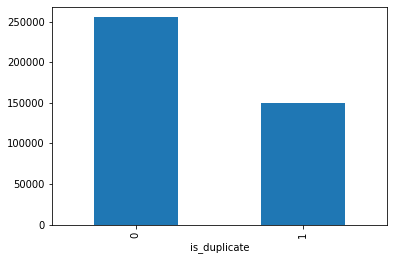

In [0]:
df.groupby("is_duplicate")['id'].count().plot.bar()

In [0]:
print('~> Total number of question pairs for training:\n   {}'.format(len(df)))

~> Total number of question pairs for training:
   404290


In [0]:
print('~> Question pairs are not Similar (is_duplicate = 0):\n   {}%'.format(100 - round(df['is_duplicate'].mean()*100, 2)))
print('\n~> Question pairs are Similar (is_duplicate = 1):\n   {}%'.format(round(df['is_duplicate'].mean()*100, 2)))

~> Question pairs are not Similar (is_duplicate = 0):
   63.08%

~> Question pairs are Similar (is_duplicate = 1):
   36.92%


## *Our distribution is almost 60/40. So we can consider it almost balanced.*

# ***3.2.2 Number of unique questions***

In [0]:
qids = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
unique_qs = len(np.unique(qids))
qs_morethan_onetime = np.sum(qids.value_counts() > 1)
print ('Total number of  Unique Questions are: {}\n'.format(unique_qs))
#print len(np.unique(qids))

print ('Number of unique questions that appear more than one time: {} ({}%)\n'.format(qs_morethan_onetime,qs_morethan_onetime/unique_qs*100))

print ('Max number of times a single question is repeated: {}\n'.format(max(qids.value_counts()))) 

q_vals=qids.value_counts()

q_vals=q_vals.values

Total number of  Unique Questions are: 537933

Number of unique questions that appear more than one time: 111780 (20.77953945937505%)

Max number of times a single question is repeated: 157



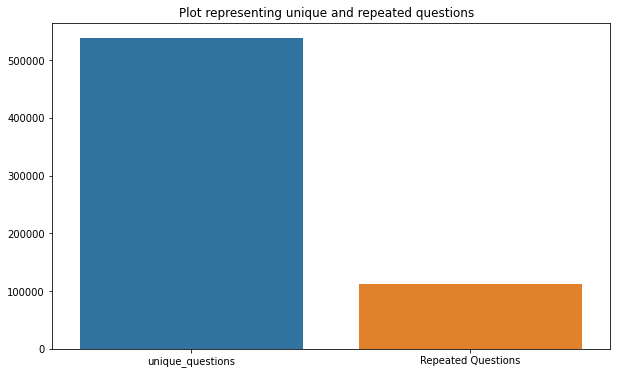

In [0]:
x = ["unique_questions" , "Repeated Questions"]
y =  [unique_qs , qs_morethan_onetime]

plt.figure(figsize=(10, 6))
plt.title ("Plot representing unique and repeated questions  ")
sns.barplot(x,y)
plt.show()

# ***3.2.3 Checking for Duplicates***

In [0]:
#checking whether there are any repeated pair of questions

pair_duplicates = df[['qid1','qid2','is_duplicate']].groupby(['qid1','qid2']).count().reset_index()

print ("Number of duplicate questions",(pair_duplicates).shape[0] - df.shape[0])

Number of duplicate questions 0


# ***3.2.4 Number of occurrences of each question***

Maximum number of times a single question is repeated: 157



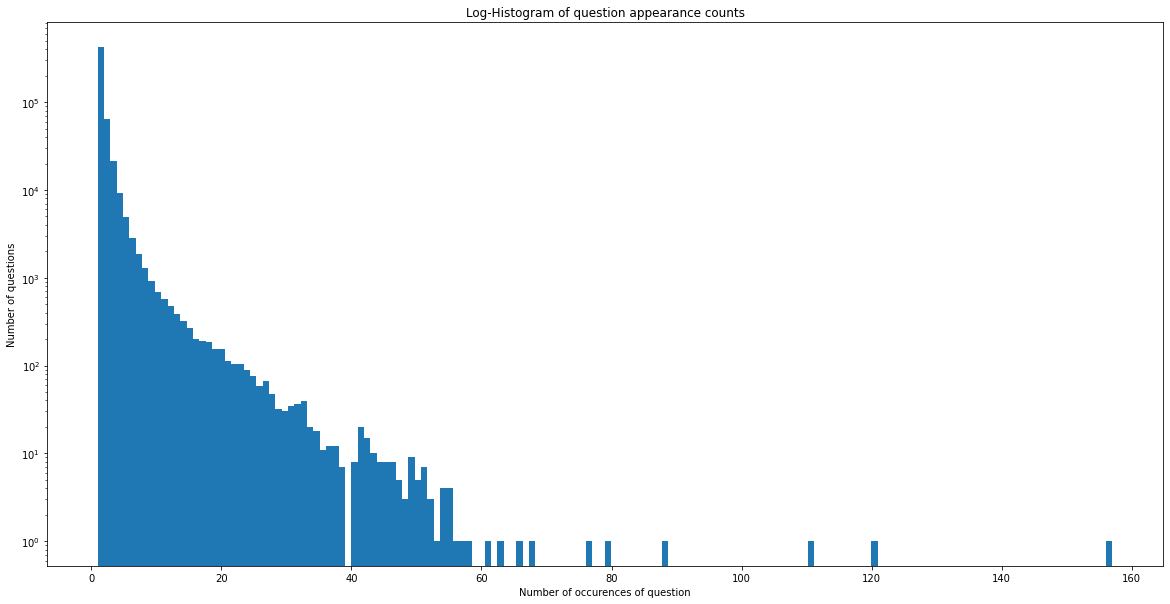

In [0]:
plt.figure(figsize=(20, 10))

plt.hist(qids.value_counts(), bins=160)

plt.yscale('log', nonposy='clip')

plt.title('Log-Histogram of question appearance counts')

plt.xlabel('Number of occurences of question')

plt.ylabel('Number of questions')

print ('Maximum number of times a single question is repeated: {}\n'.format(max(qids.value_counts())))

# ***3.2.5 Checking for NULL values***

In [0]:
#Checking whether there are any rows with null values
nan_rows = df[df.isnull().any(1)]
print (nan_rows)

            id  ...  is_duplicate
105780  105780  ...             0
201841  201841  ...             0
363362  363362  ...             0

[3 rows x 6 columns]


**There are three null values either in question1 or question2**

In [0]:
# Filling the null values with ' '
df = df.fillna('')
nan_rows = df[df.isnull().any(1)]
print (nan_rows)

Empty DataFrame
Columns: [id, qid1, qid2, question1, question2, is_duplicate]
Index: []


# ***3.3 Basic Feature Extraction (before cleaning)***

Let us now construct a few features like:
 - ____freq_qid1____ = Frequency of qid1's
 - ____freq_qid2____ = Frequency of qid2's 
 - ____q1len____ = Length of q1
 - ____q2len____ = Length of q2
 - ____q1_n_words____ = Number of words in Question 1
 - ____q2_n_words____ = Number of words in Question 2
 - ____word_Common____ = (Number of common unique words in Question 1 and Question 2)
 - ____word_Total____ =(Total num of words in Question 1 + Total num of words in Question 2)
 - ____word_share____ = (word_common)/(word_Total)
 - ____freq_q1+freq_q2____ = sum total of frequency of qid1 and qid2 
 - ____freq_q1-freq_q2____ = absolute difference of frequency of qid1 and qid2 

In [0]:
if os.path.isfile('/content/drive/My Drive/Project 4th year/QUORA VIDEO/Quora/df_fe_without_preprocessing_train.csv'):
    df = pd.read_csv("/content/drive/My Drive/Project 4th year/QUORA VIDEO/Quora/df_fe_without_preprocessing_train.csv",encoding='latin-1')
else:
    df['freq_qid1'] = df.groupby('qid1')['qid1'].transform('count') 
    df['freq_qid2'] = df.groupby('qid2')['qid2'].transform('count')
    df['q1len'] = df['question1'].str.len() 
    df['q2len'] = df['question2'].str.len()
    df['q1_n_words'] = df['question1'].apply(lambda row: len(row.split(" ")))
    df['q2_n_words'] = df['question2'].apply(lambda row: len(row.split(" ")))

    def normalized_word_Common(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * len(w1 & w2)
    df['word_Common'] = df.apply(normalized_word_Common, axis=1)

    def normalized_word_Total(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * (len(w1) + len(w2))
    df['word_Total'] = df.apply(normalized_word_Total, axis=1)

    def normalized_word_share(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * len(w1 & w2)/(len(w1) + len(w2))
    df['word_share'] = df.apply(normalized_word_share, axis=1)

    df['freq_q1+q2'] = df['freq_qid1']+df['freq_qid2']
    df['freq_q1-q2'] = abs(df['freq_qid1']-df['freq_qid2'])

    df.to_csv("df_fe_without_preprocessing_train.csv", index=False)

df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4.0,20.0,0.200000,5,3
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4.0,24.0,0.166667,2,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0.0,19.0,0.000000,2,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7,2.0,20.0,0.100000,4,2


# ***3.3.1 Analysis of some of the extracted features***

- Here are some questions have only one single words.

In [0]:
print ("Minimum length of the questions in question1 : " , min(df['q1_n_words']))

print ("Minimum length of the questions in question2 : " , min(df['q2_n_words']))

print ("Number of Questions with minimum length [question1] :", df[df['q1_n_words']== 1].shape[0])
print ("Number of Questions with minimum length [question2] :", df[df['q2_n_words']== 1].shape[0])

Minimum length of the questions in question1 :  1
Minimum length of the questions in question2 :  1
Number of Questions with minimum length [question1] : 67
Number of Questions with minimum length [question2] : 24


# ***3.3.1.1 Feature: word_share***

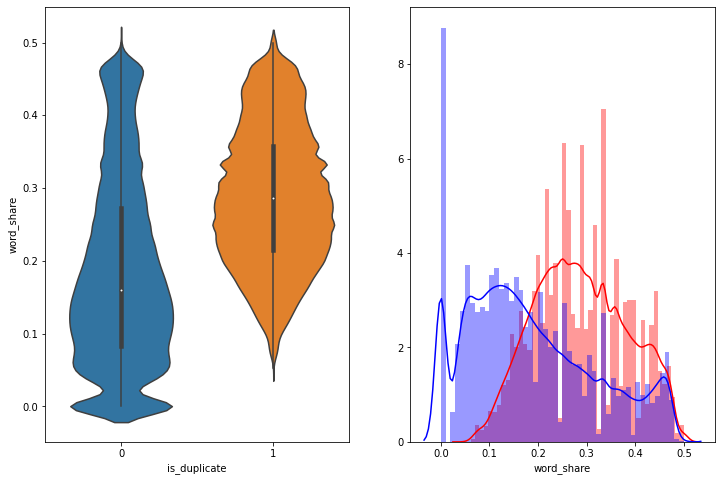

In [0]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'word_share', data = df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['word_share'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['word_share'][0:] , label = "0" , color = 'blue' )
plt.show()

- The distributions for normalized word_share have some overlap on the far right-hand side, i.e., there are quite a lot of questions with high word similarity
- In case of violin plots, the 25th percentile of is_duplicate=1 just starts somewhat above from the 50th percentile of is_duplicate=0. So, they are not fully separable but partially separable with the feature 'word_share' alone

- The average word share and Common no. of words of qid1 and qid2 is more when they are duplicate(Similar)

# ***3.3.1.2 Feature: word_Common***

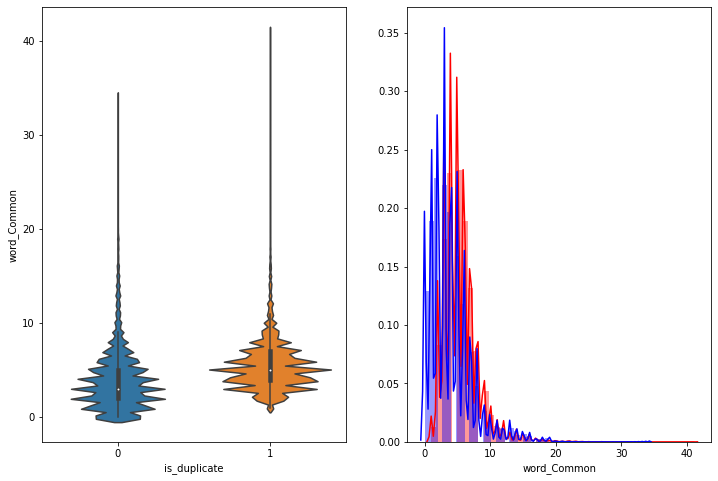

In [0]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'word_Common', data = df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['word_Common'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['word_Common'][0:] , label = "0" , color = 'blue' )
plt.show()

<p> The distributions of the word_Common feature in similar and non-similar questions are highly overlapping. Hence it is almost impossible to distinguish b/w duplicate and non_duplicate with the feature 'word_common' alone. </p>

In [0]:
#https://stackoverflow.com/questions/12468179/unicodedecodeerror-utf8-codec-cant-decode-byte-0x9c
if os.path.isfile('/content/drive/My Drive/Project 4th year/QUORA VIDEO/Quora/df_fe_without_preprocessing_train.csv'):
    df = pd.read_csv("/content/drive/My Drive/Project 4th year/QUORA VIDEO/Quora/df_fe_without_preprocessing_train.csv",encoding='latin-1')
    df = df.fillna('')
    df.head()
else:
    print("get df_fe_without_preprocessing_train.csv from drive or run the previous notebook")

In [0]:
df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4.0,20.0,0.200000,5,3


# ***3.4 Preprocessing of Text***

- Preprocessing:
    - Removing html tags 
    - Removing Punctuations
    - Performing stemming
    - Removing Stopwords
    - Expanding contractions etc.

In [0]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
# To get the results in 4 decemal points
SAFE_DIV = 0.0001 
STOP_WORDS = stopwords.words("english")

def preprocess(x):
    x = str(x).lower()
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will")
    x = re.sub(r"([0-9]+)000000", r"\1m", x)
    x = re.sub(r"([0-9]+)000", r"\1k", x)
    
    
    porter = PorterStemmer()
    pattern = re.compile('\W')
    
    if type(x) == type(''):
        x = re.sub(pattern, ' ', x)
    
    
    if type(x) == type(''):
        x = porter.stem(x)
        example1 = BeautifulSoup(x)
        x = example1.get_text()
               
    
    return x
    

- Function to Compute and get the features : With 2 parameters of Question 1 and Question 2

# ***3.5 Advanced Feature Extraction (NLP and Fuzzy Features)***

Definition:
- __Token__: You get a token by splitting sentence a space
- __Stop_Word__ : stop words as per NLTK.
- __Word__ : A token that is not a stop_word


Features:
- __cwc_min__ :  Ratio of common_word_count to min lenghth of word count of Q1 and Q2 <br>cwc_min = common_word_count / (min(len(q1_words), len(q2_words))
<br>
<br>
- __cwc_max__ :  Ratio of common_word_count to max lenghth of word count of Q1 and Q2 <br>cwc_max = common_word_count / (max(len(q1_words), len(q2_words))
<br>
<br>
- __csc_min__ :  Ratio of common_stop_count to min lenghth of stop count of Q1 and Q2 <br> csc_min = common_stop_count / (min(len(q1_stops), len(q2_stops))
<br>
<br>
- __csc_max__ :  Ratio of common_stop_count to max lenghth of stop count of Q1 and Q2<br>csc_max = common_stop_count / (max(len(q1_stops), len(q2_stops))
<br>
<br>
- __ctc_min__ :  Ratio of common_token_count to min lenghth of token count of Q1 and Q2<br>ctc_min = common_token_count / (min(len(q1_tokens), len(q2_tokens))
<br>
<br>

- __ctc_max__ :  Ratio of common_token_count to max lenghth of token count of Q1 and Q2<br>ctc_max = common_token_count / (max(len(q1_tokens), len(q2_tokens))
<br>
<br>
        
- __last_word_eq__ :  Check if Last word of both questions is equal or not<br>last_word_eq = int(q1_tokens[-1] == q2_tokens[-1])
<br>
<br>

- __first_word_eq__ :  Check if First word of both questions is equal or not<br>first_word_eq = int(q1_tokens[0] == q2_tokens[0])
<br>
<br>
        
- __abs_len_diff__ :  Abs. length difference<br>abs_len_diff = abs(len(q1_tokens) - len(q2_tokens))
<br>
<br>

- __mean_len__ :  Average Token Length of both Questions<br>mean_len = (len(q1_tokens) + len(q2_tokens))/2
<br>
<br>


- __fuzz_ratio__ :  https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>

- __fuzz_partial_ratio__ :  https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>


- __token_sort_ratio__ : https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>


- __token_set_ratio__ : https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>





- __longest_substr_ratio__ :  Ratio of length longest common substring to min lenghth of token count of Q1 and Q2<br>longest_substr_ratio = len(longest common substring) / (min(len(q1_tokens), len(q2_tokens))


In [0]:
def get_token_features(q1, q2):
    token_features = [0.0]*10
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features
    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    token_features[8] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    token_features[9] = (len(q1_tokens) + len(q2_tokens))/2
    return token_features

# get the Longest Common sub string

def get_longest_substr_ratio(a, b):
    strs = list(distance.lcsubstrings(a, b))
    if len(strs) == 0:
        return 0
    else:
        return len(strs[0]) / (min(len(a), len(b)) + 1)

def extract_features(df):
    # preprocessing each question
    df["question1"] = df["question1"].fillna("").apply(preprocess)
    df["question2"] = df["question2"].fillna("").apply(preprocess)

    print("token features...")
    
    # Merging Features with dataset
    
    token_features = df.apply(lambda x: get_token_features(x["question1"], x["question2"]), axis=1)
    
    df["cwc_min"]       = list(map(lambda x: x[0], token_features))
    df["cwc_max"]       = list(map(lambda x: x[1], token_features))
    df["csc_min"]       = list(map(lambda x: x[2], token_features))
    df["csc_max"]       = list(map(lambda x: x[3], token_features))
    df["ctc_min"]       = list(map(lambda x: x[4], token_features))
    df["ctc_max"]       = list(map(lambda x: x[5], token_features))
    df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
    df["first_word_eq"] = list(map(lambda x: x[7], token_features))
    df["abs_len_diff"]  = list(map(lambda x: x[8], token_features))
    df["mean_len"]      = list(map(lambda x: x[9], token_features))
   
    #Computing Fuzzy Features and Merging with Dataset
    
    # do read this blog: http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
    # https://stackoverflow.com/questions/31806695/when-to-use-which-fuzz-function-to-compare-2-strings
    # https://github.com/seatgeek/fuzzywuzzy
    print("fuzzy features..")

    df["token_set_ratio"]       = df.apply(lambda x: fuzz.token_set_ratio(x["question1"], x["question2"]), axis=1)
    # The token sort approach involves tokenizing the string in question, sorting the tokens alphabetically, and 
    # then joining them back into a string We then compare the transformed strings with a simple ratio().
    df["token_sort_ratio"]      = df.apply(lambda x: fuzz.token_sort_ratio(x["question1"], x["question2"]), axis=1)
    df["fuzz_ratio"]            = df.apply(lambda x: fuzz.QRatio(x["question1"], x["question2"]), axis=1)
    df["fuzz_partial_ratio"]    = df.apply(lambda x: fuzz.partial_ratio(x["question1"], x["question2"]), axis=1)
    df["longest_substr_ratio"]  = df.apply(lambda x: get_longest_substr_ratio(x["question1"], x["question2"]), axis=1)
    return df

In [0]:
if os.path.isfile('/content/drive/My Drive/Project 4th year/QUORA VIDEO/Quora/nlp_features_train.csv'):
    df = pd.read_csv("/content/drive/My Drive/Project 4th year/QUORA VIDEO/Quora/nlp_features_train.csv",encoding='latin-1')
    df.fillna('')
else:
    print("Extracting features for train:")
    df = pd.read_csv("train.csv")
    df = extract_features(df)
    df.to_csv("/content/drive/My Drive/Project 4th year/QUORA VIDEO/Quora/nlp_features_train.csv", index=False)
df.head(2)

Extracting features for train:
token features...
fuzzy features..


,id,qid1,qid2,question1,question2,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154


# ***3.5.1 Analysis of extracted features***

- Creating Word Cloud of Duplicates and Non-Duplicates Question pairs
- We can observe the most frequent occuring words

In [0]:
df_duplicate = df[df['is_duplicate'] == 1]
dfp_nonduplicate = df[df['is_duplicate'] == 0]

# Converting 2d array of q1 and q2 and flatten the array: like {{1,2},{3,4}} to {1,2,3,4}
p = np.dstack([df_duplicate["question1"], df_duplicate["question2"]]).flatten()
n = np.dstack([dfp_nonduplicate["question1"], dfp_nonduplicate["question2"]]).flatten()

print ("Number of data points in class 1 (duplicate pairs) :",len(p))
print ("Number of data points in class 0 (non duplicate pairs) :",len(n))

#Saving the np array into a text file
np.savetxt('train_p.txt', p, delimiter=' ', fmt='%s')
np.savetxt('train_n.txt', n, delimiter=' ', fmt='%s')

Number of data points in class 1 (duplicate pairs) : 298526
Number of data points in class 0 (non duplicate pairs) : 510054


In [0]:
# reading the text files and removing the Stop Words:
d = path.dirname('.')

textp_w = open(path.join(d, 'train_p.txt')).read()
textn_w = open(path.join(d, 'train_n.txt')).read()
stopwords = set(STOPWORDS)
stopwords.add("said")
stopwords.add("br")
stopwords.add(" ")
stopwords.remove("not")

stopwords.remove("no")
#stopwords.remove("good")
#stopwords.remove("love")
stopwords.remove("like")
#stopwords.remove("best")
#stopwords.remove("!")
print ("Total number of words in duplicate pair questions :",len(textp_w))
print ("Total number of words in non duplicate pair questions :",len(textn_w))

Total number of words in duplicate pair questions : 16109886
Total number of words in non duplicate pair questions : 33193067


__ Word Clouds generated from  duplicate pair question's text __

Word Cloud for Duplicate Question pairs


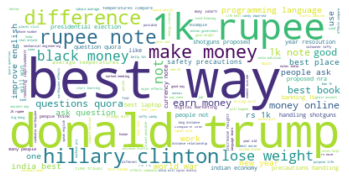

In [0]:
wc = WordCloud(background_color="white", max_words=len(textp_w), stopwords=stopwords)
wc.generate(textp_w)
print ("Word Cloud for Duplicate Question pairs")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

__ Word Clouds generated from non duplicate pair question's text __

Word Cloud for non-Duplicate Question pairs:


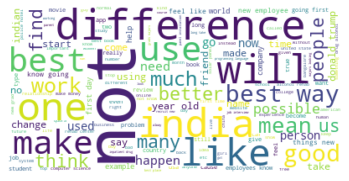

In [0]:
wc = WordCloud(background_color="white", max_words=len(textn_w),stopwords=stopwords)
# generate word cloud
wc.generate(textn_w)
print ("Word Cloud for non-Duplicate Question pairs:")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# ***3.5.1.2 Pair plot of features ['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio']***

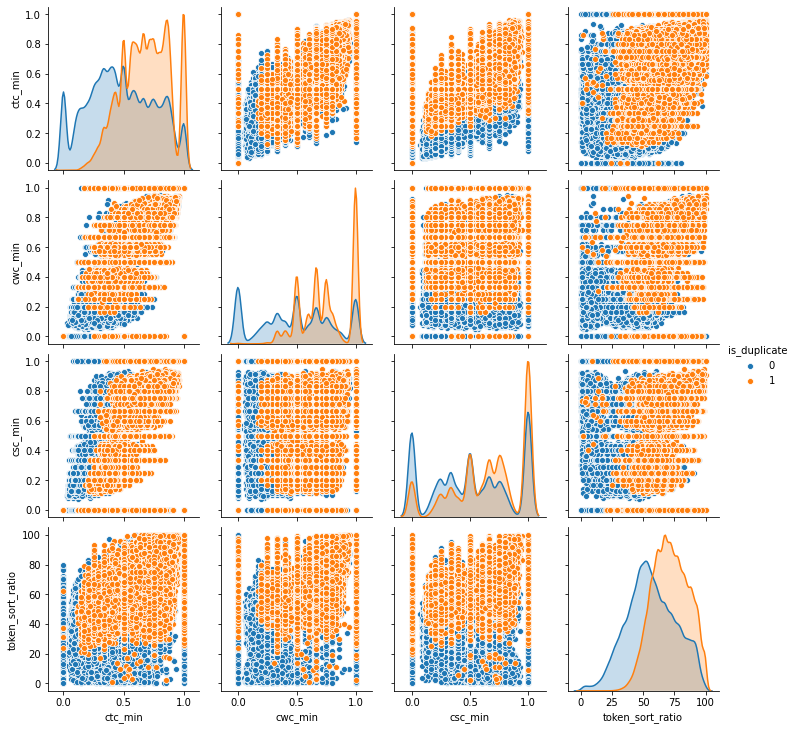

In [0]:
n = df.shape[0]
sns.pairplot(df[['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio', 'is_duplicate']][0:n], hue='is_duplicate', vars=['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio'])
plt.show()

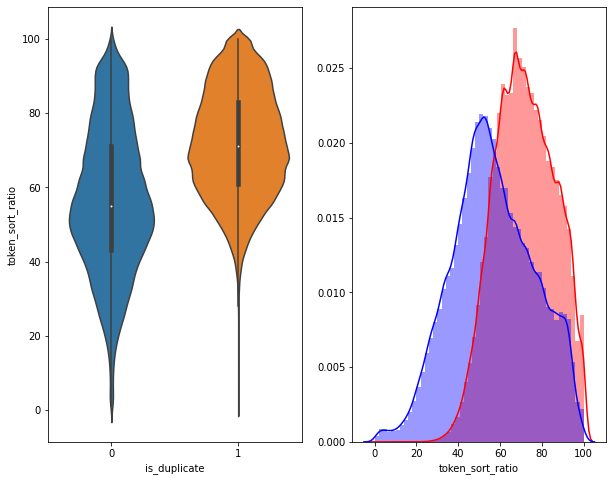

In [0]:
# Distribution of the token_sort_ratio
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'token_sort_ratio', data = df[0:] , )

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['token_sort_ratio'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['token_sort_ratio'][0:] , label = "0" , color = 'blue' )
plt.show()

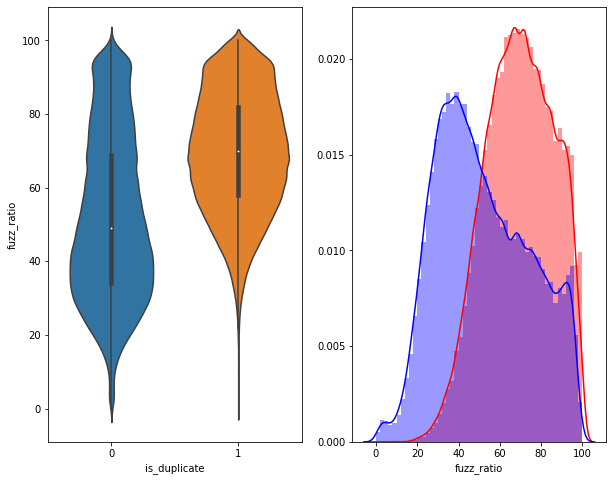

In [0]:
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'fuzz_ratio', data = df[0:] , )

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['fuzz_ratio'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['fuzz_ratio'][0:] , label = "0" , color = 'blue' )
plt.show()

# ***3.5.2 Visualization***

In [0]:
# Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimention

from sklearn.preprocessing import MinMaxScaler

dfp_subsampled = df[0:5000]
X = MinMaxScaler().fit_transform(dfp_subsampled[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y = dfp_subsampled['is_duplicate'].values

In [0]:
tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.029s...
[t-SNE] Computed neighbors for 5000 samples in 0.396s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.130446
[t-SNE] Computed conditional probabilities in 0.310s
[t-SNE] Iteration 50: error = 81.3346405, gradient norm = 0.0466835 (50 iterations in 2.446s)
[t-SNE] Iteration 100: error = 70.6411362, gradient norm = 0.0087385 (50 iterations in 1.688s)
[t-SNE] Iteration 150: error = 68.9421158, gradient norm = 0.0055224 (50 iterations in 1.620s)
[t-SNE] Iteration 200: error = 68.1217880, gradient norm = 0.0044136 (50 iterations in 1.681s)
[t-SNE] Iteration 250: error = 67.6154175, gradient norm = 0.0040027

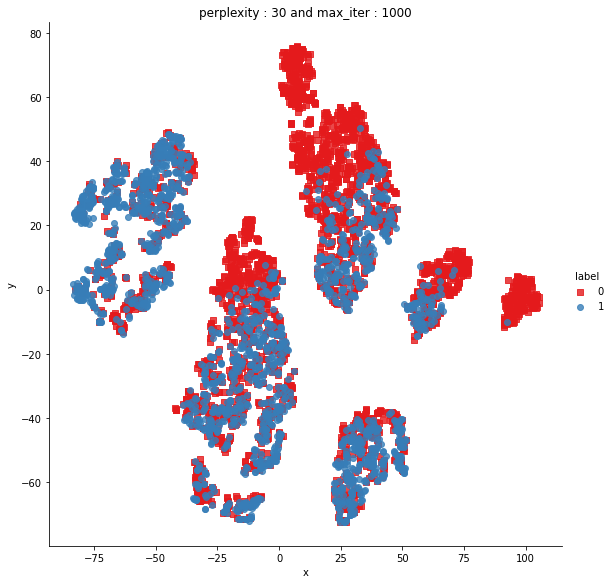

In [0]:
df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,palette="Set1",markers=['s','o'])
plt.title("perplexity : {} and max_iter : {}".format(30, 1000))
plt.show()

In [0]:
from sklearn.manifold import TSNE
tsne3d = TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.014s...
[t-SNE] Computed neighbors for 5000 samples in 0.406s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.130446
[t-SNE] Computed conditional probabilities in 0.306s
[t-SNE] Iteration 50: error = 80.5661621, gradient norm = 0.0296227 (50 iterations in 10.067s)
[t-SNE] Iteration 100: error = 69.4089432, gradient norm = 0.0033432 (50 iterations in 4.691s)
[t-SNE] Iteration 150: error = 67.9962845, gradient norm = 0.0018752 (50 iterations in 4.417s)
[t-SNE] Iteration 200: error = 67.4377289, gradient norm = 0.0011330 (50 iterations in 4.315s)
[t-SNE] Iteration 250: error = 67.1244202, gradient norm = 0.000859

In [0]:
trace1 = go.Scatter3d(
    x=tsne3d[:,0],
    y=tsne3d[:,1],
    z=tsne3d[:,2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = y,
        colorscale = 'Portland',
        colorbar = dict(title = 'duplicate'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.75
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='3d embedding with engineered features')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

# ***3.6 Featurizing text data with tfidf weighted word-vectors***

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
warnings.filterwarnings("ignore")
import sys
import os 
import pandas as pd
import numpy as np
from tqdm import tqdm

# exctract word2vec vectors
# https://github.com/explosion/spaCy/issues/1721
# http://landinghub.visualstudio.com/visual-cpp-build-tools
import spacy

In [0]:
# avoid decoding problems
df = pd.read_csv("train.csv")
 
# encode questions to unicode
# https://stackoverflow.com/a/6812069
# ----------------- python 2 ---------------------
# df['question1'] = df['question1'].apply(lambda x: unicode(str(x),"utf-8"))
# df['question2'] = df['question2'].apply(lambda x: unicode(str(x),"utf-8"))
# ----------------- python 3 ---------------------
df['question1'] = df['question1'].apply(lambda x: str(x))
df['question2'] = df['question2'].apply(lambda x: str(x))

In [0]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(df['question1']) + list(df['question2'])

tfidf = TfidfVectorizer(lowercase=False,)
tfidf.fit_transform(questions)

# dict key:word and value:tf-idf score
word2tfidf = dict(zip(tfidf.get_feature_names(), tfidf.idf_))

- After we find TF-IDF scores, we convert each question to a weighted average of word2vec vectors by these scores.
- here we use a pre-trained GLOVE model which comes free with "Spacy".  https://spacy.io/usage/vectors-similarity
- It is trained on Wikipedia and therefore, it is stronger in terms of word semantics. 

In [0]:
import en_core_web_sm

In [0]:
# en_vectors_web_lg, which includes over 1 million unique vectors.
nlp = spacy.load('en_core_web_sm')

nlp = spacy.load('en_core_web_sm')

vecs1 = []
# https://github.com/noamraph/tqdm
# tqdm is used to print the progress bar
for qu1 in tqdm(list(df['question1'])):
    doc1 = nlp(qu1) 
    # 384 is the number of dimensions of vectors 
    mean_vec1 = np.zeros([len(doc1), len(doc1[0].vector)])
    for word1 in doc1:
        # word2vec
        vec1 = word1.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word1)]
        except:
            idf = 0
        # compute final vec
        mean_vec1 += vec1 * idf
    mean_vec1 = mean_vec1.mean(axis=0)
    vecs1.append(mean_vec1)
df['q1_feats_m'] = list(vecs1)

100%|██████████| 404290/404290 [1:05:06<00:00, 103.50it/s]


In [0]:
vecs2 = []
for qu2 in tqdm(list(df['question2'])):
    doc2 = nlp(qu2) 
    mean_vec2 = np.zeros([len(doc2), 384])
    for word2 in doc2:
        # word2vec
        vec2 = word2.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word2)]
        except:
            #print word
            idf = 0
        # compute final vec
        mean_vec2 += vec2 * idf
    mean_vec2 = mean_vec2.mean(axis=0)
    vecs2.append(mean_vec2)
df['q2_feats_m'] = list(vecs2)

100%|██████████| 404290/404290 [51:38<00:00, 130.49it/s]


In [0]:
#prepro_features_train.csv (Simple Preprocessing Feartures)
#nlp_features_train.csv (NLP Features)
if os.path.isfile('/content/drive/My Drive/Project 4th year/QUORA VIDEO/Quora/nlp_features_train.csv'):
    dfnlp = pd.read_csv("/content/drive/My Drive/Project 4th year/QUORA VIDEO/Quora/nlp_features_train.csv",encoding='latin-1')
else:
    print("download nlp_features_train.csv from drive or run previous notebook")

if os.path.isfile('/content/drive/My Drive/Project 4th year/QUORA VIDEO/Quora/df_fe_without_preprocessing_train.csv'):
    dfppro = pd.read_csv("/content/drive/My Drive/Project 4th year/QUORA VIDEO/Quora/df_fe_without_preprocessing_train.csv",encoding='latin-1')
else:
    print("download df_fe_without_preprocessing_train.csv from drive or run previous notebook")

In [0]:
df1 = dfnlp.drop(['qid1','qid2','question1','question2'],axis=1)
df2 = dfppro.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)
df3 = df.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)
df3_q1 = pd.DataFrame(df3.q1_feats_m.values.tolist(), index= df3.index)
df3_q2 = pd.DataFrame(df3.q2_feats_m.values.tolist(), index= df3.index)

In [0]:
# dataframe of nlp features
df1.head()

,id,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759
1,1,0,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154
2,2,0,0.399992,0.333328,0.399992,0.249997,0.399996,0.285712,0.0,1.0,4.0,12.0,63,63,43,47,0.166667
3,3,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.0,12.0,28,24,9,14,0.039216
4,4,0,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,0.0,1.0,6.0,10.0,67,47,35,56,0.175000


In [0]:
# data before preprocessing 
df2.head()

,id,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,4,1,51,88,8,13,4.0,20.0,0.200000,5,3
2,2,1,1,73,59,14,10,4.0,24.0,0.166667,2,0
3,3,1,1,50,65,11,9,0.0,19.0,0.000000,2,0
4,4,3,1,76,39,13,7,2.0,20.0,0.100000,4,2


In [0]:
# Questions 1 tfidf weighted word2vec
df3_q1.head()

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
0,121.929942,100.083880,72.497911,115.641811,-48.370869,34.619061,-172.057791,-92.502620,113.223269,50.562425,...,12.397645,40.909527,8.150259,-15.170695,18.007704,6.167002,-30.124162,3.700891,-1.757701,-1.818054
1,-78.070951,54.843758,82.738470,98.191843,-51.234829,55.013499,-39.140743,-82.692363,45.161478,-9.556312,...,-21.987076,-12.389276,20.667988,2.202712,-17.142450,-5.880969,-10.123960,-4.890663,-13.018387,-5.219299
2,-5.355038,73.671822,14.376389,104.130229,1.433505,35.229101,-148.519386,-97.124609,41.972183,50.948724,...,3.027701,14.025776,-2.960310,-3.206542,4.355143,2.936156,-20.199560,9.816350,11.894365,-8.798817
3,5.778357,-34.712029,48.999641,59.699237,40.661264,-41.658736,-36.808583,24.170647,0.235591,-29.407297,...,13.100011,1.405662,-1.891074,-7.882639,18.000562,12.106919,-10.507836,5.243826,10.158344,5.886345
4,51.138244,38.587245,123.639505,53.333045,-47.062794,37.356188,-298.722757,-106.421101,106.248917,65.880708,...,13.906532,43.461717,11.519202,-22.468288,45.431128,8.161224,-35.373911,7.728860,9.592854,5.447332


In [0]:
# Questions 2 tfidf weighted word2vec
df3_q2.head()

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
0,125.983298,95.636470,42.114726,95.450003,-37.386298,39.400067,-148.116056,-87.851470,110.371952,62.272808,...,16.165598,33.030675,7.019995,-14.793956,15.437508,8.199661,-25.070837,1.571609,1.603732,0.305657
1,-106.871918,80.290394,79.066295,59.302086,-42.175396,117.616721,-144.364294,-127.131529,22.962535,25.397595,...,-4.901131,-4.565384,41.520752,-0.727562,-16.413774,-7.373776,2.638878,-7.403461,2.703065,0.408052
2,7.072902,15.513379,1.846908,85.937593,-33.808806,94.702355,-122.256852,-114.009528,53.922329,60.131812,...,8.359975,-2.165974,10.936577,-16.531654,14.681221,15.633755,-1.210893,14.183818,11.703130,10.148080
3,39.421524,44.136999,-24.010940,85.265890,-0.339027,-9.323140,-60.499645,-37.044788,49.407829,-23.350167,...,3.311411,3.788880,13.398604,-6.592597,6.437358,5.993291,2.732391,-3.727645,5.614124,6.023692
4,31.950129,62.854121,1.778174,36.218745,-45.130847,66.674900,-106.342323,-22.901015,59.835930,62.663936,...,-2.403874,11.991198,8.088481,-15.090199,8.375162,1.727222,-6.601128,11.317407,11.544598,2.478690


In [0]:
print("Number of features in nlp dataframe :", df1.shape[1])
print("Number of features in preprocessed dataframe :", df2.shape[1])
print("Number of features in question1 w2v  dataframe :", df3_q1.shape[1])
print("Number of features in question2 w2v  dataframe :", df3_q2.shape[1])
print("Number of features in final dataframe  :", df1.shape[1]+df2.shape[1]+df3_q1.shape[1]+df3_q2.shape[1])

Number of features in nlp dataframe : 17
Number of features in preprocessed dataframe : 12
Number of features in question1 w2v  dataframe : 384
Number of features in question2 w2v  dataframe : 384
Number of features in final dataframe  : 797


In [0]:
# storing the final features to csv file
if not os.path.isfile('/content/drive/My Drive/Project 4th year/QUORA VIDEO/Quora/final_features.csv'):
    df3_q1['id']=df1['id']
    df3_q2['id']=df1['id']
    df1  = df1.merge(df2, on='id',how='left')
    df2  = df3_q1.merge(df3_q2, on='id',how='left')
    result  = df1.merge(df2, on='id',how='left')
    result.to_csv('/content/drive/My Drive/Project 4th year/QUORA VIDEO/Quora/final_features.csv')

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import sqlite3
from sqlalchemy import create_engine # database connection
import csv
import os
warnings.filterwarnings("ignore")
import datetime as dt
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier



from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

# ***4. Machine Learning Models***

# ***4.1Reading Data and Dropping unnecessary columns***

In [0]:
data = pd.read_csv('/content/drive/My Drive/Project 4th year/QUORA VIDEO/Quora/final_features.csv')

In [0]:
# remove the first row 
data.drop(data.index[0], inplace=True)
y_true = data['is_duplicate']
data.drop(['Unnamed: 0', 'id', 'is_duplicate'], axis=1, inplace=True)

In [0]:
data.head()

,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,10_x,11_x,12_x,13_x,...,344_y,345_y,346_y,347_y,348_y,349_y,350_y,351_y,352_y,353_y,354_y,355_y,356_y,357_y,358_y,359_y,360_y,361_y,362_y,363_y,364_y,365_y,366_y,367_y,368_y,369_y,370_y,371_y,372_y,373_y,374_y,375_y,376_y,377_y,378_y,379_y,380_y,381_y,382_y,383_y
1,0.999980000399992,0.8333194446759221,0.9999833336111064,0.9999833336111064,0.9166590278414348,0.7857086735094749,0.0,1.0,2.0,13.0,100,93,93,100,0.9827586206896552,1,1,66,57,14,12,10.0,23.0,0.43478260869565216,2,0,121.92992651462555,100.08389979600906,72.4978935867548,115.64179959893227,-48.370869524776936,34.61905753612518,-172.0577874071896,-92.50261698663235,113.22331494092941,50.56244073063135,38.57511969655752,-27.622443795204163,-21.129949152469635,-44.07265484333038,...,-14.60861124098301,-14.1535135358572,-29.568827522918582,29.144799083471298,41.08701667189598,-6.7114982679486275,-8.812467485666275,7.90652247518301,-27.432419829070568,10.599943479523063,16.95288595557213,-15.785522997379303,-18.36174976825714,-23.12575613707304,-7.145598083734512,-15.993189215660095,-0.4936094880104065,3.726501904428005,25.448064982891083,16.128444250673056,-27.806873559951782,-2.4369320273399353,5.134369365870953,-8.074995920062065,24.42184618115425,8.739253781735897,-17.28515362739563,13.440285168588161,-13.209145169705153,1.0799191646874533,16.165591794997454,33.03066773712635,7.019996479153633,-14.79395866394043,15.437511138617992,8.199658364057541,-25.070833824574947,1.5716187469661236,1.603737734258175,0.30564504861831665
2,0.7999840003199936,0.3999960000399996,0.7499812504687383,0.5999880002399952,0.6999930000699993,0.4666635555762962,0.0,1.0,5.0,12.5,86,63,66,75,0.5961538461538461,4,1,51,88,8,13,4.0,20.0,0.2,5,3,-78.07093858718872,54.84378078579903,82.73848235607147,98.19187158346176,-51.234859347343445,55.01350963115692,-39.14073038101196,-82.69235163927078,45.161489367485046,-9.556288570165634,-79.72163179144263,25.818639993667603,-7.883404940366745,-124.30812501907349,...,-1.663619875907898,-0.4029378741979599,-14.087218578904867,38.53820177540183,9.727834075689316,13.917809639126062,-22.55917066335678,6.881676696240902,-27.18251569569111,23.088673220016062,24.73110470175743,11.367433827370405,6.593837603926659,-24.4933280646801,-19.29644950479269,-33.00843505561352,-26.038134455680847,24.66990276426077,27.983947925269604,1.6389380628243089,-24.155492067337036,-9.086082564666867,1.4146484583616257,8.240656971931458,8.082218170166016,16.56808043271303,2.1141711696982384,1.4942813962697983,17.547449499368668,-7.709980878978968,-4.901127845048904,-4.5653929859399796,41.52075131982565,-0.7275639921426773,-16.413776002824306,-7.373777587432414,2.6388769447803497,-7.403456658124924,2.7030695155262947,0.4080396294593811
3,0.3999920001599968,0.3333277778703688,0.3999920001599968,0.24999687503906198,0.3999960000399996,0.28571224491253633,0.0,1.0,4.0,12.0,66,66,54,54,0.16666666666666666,1,1,73,59,14,10,4.0,24.0,0.16666666666666666,2,0,-5.3550145626068115,73.6718100309372,14.376365035772324,104.13024079799652,1.4335369765758514,35.229116186499596,-148.51938462257385,-97.12459510564804,41.9721953868866,50.94873118400574,52.444492638111115,-45.197927713394165,74.04259729385376,-35.91501837968826,...,-8.954575037583709,-15.803813755512238,-5.150883428752422,17.27068954706192,14.479286134243011,-8.041332021355629,-37.7650460023433,8.256755262613297,-37.23259562253952,0.9892063140869141,11.408972084522247,-3.1914246948435903,-12.339836806058884,-24.161269575357437,-10.353968035429716,-28.326909087598324,-12.874844647943974,6.732092201709747,8.607652068138123,0.7454319782555103,-25.891975164413452,-9.892550975084305,-6.40780645608902,-1.3223688956350088,1

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404290 entries, 1 to 404290
Columns: 794 entries, cwc_min to 383_y
dtypes: object(794)
memory usage: 2.4+ GB


# ***4.2 Converting whole dataframe into float64 Format***

In [0]:
# we convert all the features into numaric before we apply any model
cols = list(data.columns)
data = pd.DataFrame(np.array(data.values,dtype=np.float64),columns=cols)

In [0]:
y_true = list(map(int, y_true.values))

# ***4.3 Random train test split( 70:30)***

In [0]:
X_train,X_test, y_train, y_test = train_test_split(data, y_true, stratify=y_true, test_size=0.3,random_state=13)

In [0]:
print("Number of data points in train data :",X_train.shape)
print("Number of data points in test data :",X_test.shape)

Number of data points in train data : (283003, 794)
Number of data points in test data : (121287, 794)


In [0]:
print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len)
print("-"*10, "Distribution of output variable in train data", "-"*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",int(test_distr[1])/test_len, "Class 1: ",int(test_distr[1])/test_len)

---------- Distribution of output variable in train data ----------
Class 0:  0.6308025003268517 Class 1:  0.36919749967314835
---------- Distribution of output variable in train data ----------
Class 0:  0.3691986775169639 Class 1:  0.3691986775169639


# ***4.3.2 Defining a custom confusion matrix plotting function***

In [0]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

# ***4.4 Building a random model (Finding worst-case log-loss)***

Log loss on Test Data using Random Model 0.8864748867538765
Hence the worst log loss that can happen is 0.8864748867538765 This is the tighest bound of log loss. Any model should have a log loss lesser than this


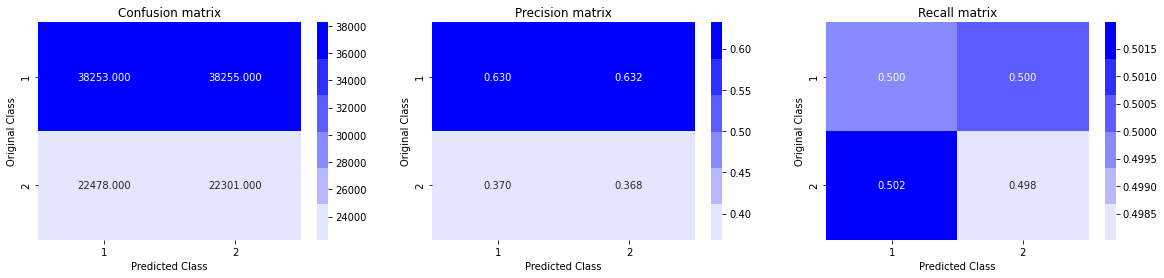

In [0]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
# we create a output array that has exactly same size as the CV data
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))
print("Hence the worst log loss that can happen is", log_loss(y_test, predicted_y, eps=1e-15), "This is the tighest bound of log loss. Any model should have a log loss lesser than this")


predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

# ***4.5 SGD is sensitive to feature scaling, so doing scaling.***

In [0]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train_sc = scale.fit_transform(X_train)
X_test_sc = scale.transform(X_test)

# ***4.6 Logistic Regression with hyperparameter tuning Log Loss***

For values of best alpha =  0.00033503 The train log loss is: 0.3967317989723093
For values of best alpha =  0.00033503 The test log loss is: 0.3990776840237584
Total number of data points : 121287


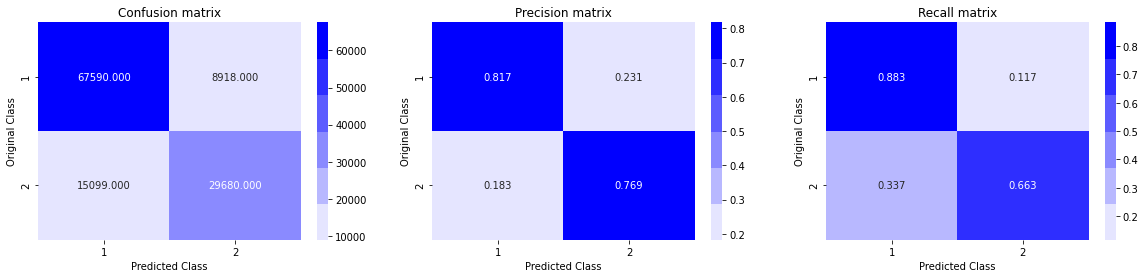

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

alpha = np.random.uniform(0.000025,0.00035,14)
alpha = np.round(alpha,8)
alpha.sort()

log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_sc, y_train)
    predict_y = sig_clf.predict_proba(X_test_sc)
    log_error_array.append(log_loss(y_test, predict_y, eps=1e-15))
    #print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, eps=1e-15))



best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_sc, y_train)

predict_y = sig_clf.predict_proba(X_train_sc)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y,eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_sc)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y,eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

# ***4.7 Linear SVM with hyperparameter tuning and log loss***

For values of best alpha =  0.00033217 The train log loss is: 0.39892980370357234
For values of best alpha =  0.00033217 The test log loss is: 0.4009371854327364
Total number of data points : 121287


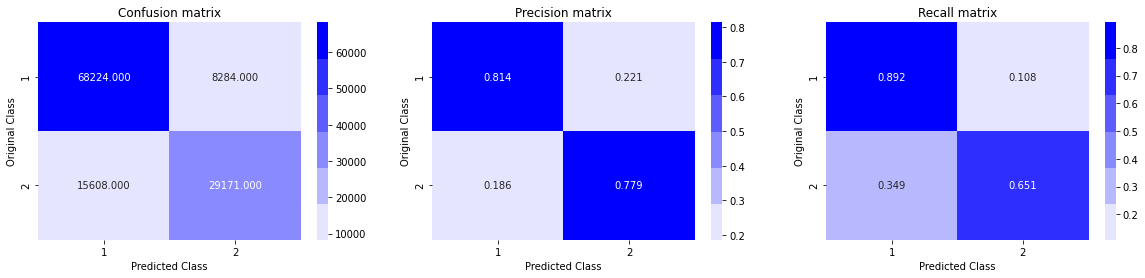

In [0]:
#alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------
alpha = np.random.uniform(0.000025,0.00035,14)
alpha = np.round(alpha,8)
alpha.sort()

log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='hinge', random_state=42)#applying hinge loss to apply svm
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_sc, y_train)
    predict_y = sig_clf.predict_proba(X_test_sc)
    log_error_array.append(log_loss(y_test, predict_y, eps=1e-15))
    #print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, eps=1e-15))



best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_sc, y_train)

predict_y = sig_clf.predict_proba(X_train_sc)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y,eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_sc)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y,eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

# ***4.8 Random Forest Classifier Bagging(Row Sampling + Column Sampling)*** #

estimators =  75 Train Log Loss  0.372178057827491 Test Log Loss  0.4054459438796611
estimators =  100 Train Log Loss  0.3729240049398293 Test Log Loss  0.40618011930645426
estimators =  150 Train Log Loss  0.37183604067254183 Test Log Loss  0.40589591506443745
estimators =  200 Train Log Loss  0.3717528831577246 Test Log Loss  0.40573122278955653
estimators =  300 Train Log Loss  0.3739610689908618 Test Log Loss  0.4074967303294889
estimators =  400 Train Log Loss  0.37230384599798033 Test Log Loss  0.40600594635983916
estimators =  600 Train Log Loss  0.37312402184177523 Test Log Loss  0.40676996604507215


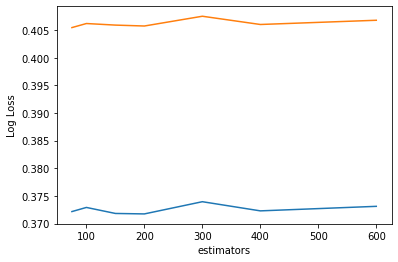

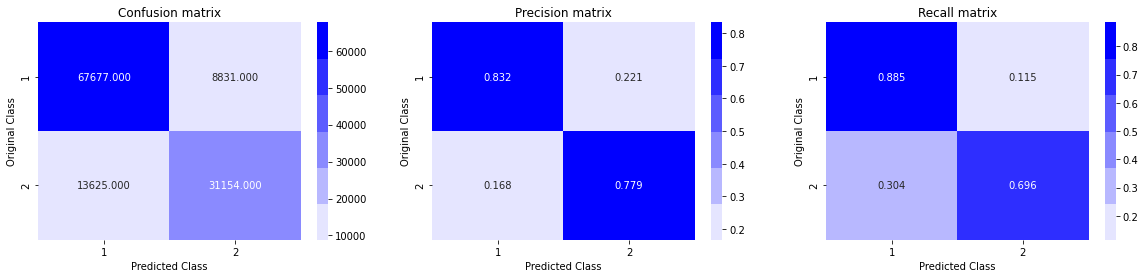

In [0]:
from sklearn.ensemble import RandomForestClassifier as RFC

estimators = [75,100,150,200,300,400,600]
test_scores = []
train_scores = []
for i in estimators:
    clf = RFC(n_estimators=i,max_depth=12,n_jobs=-1)#low bias high variance model, as depth increases variance increases. while bagging the variance will come down automatically in fact very low. n_jobs=-1 to parallalize the task into cpu cores
    #class_weight={0: 1, 1: 1.75}
    clf.fit(X_train_sc,y_train)
    predict_y = clf.predict_proba(X_train_sc)
    log_loss_train = log_loss(y_train, predict_y, eps=1e-15)
    train_scores.append(log_loss_train)
    predict_y = clf.predict_proba(X_test_sc)
    log_loss_test = log_loss(y_test, predict_y, eps=1e-15)
    test_scores.append(log_loss_test)
    print('estimators = ',i,'Train Log Loss ',log_loss_train,'Test Log Loss ',log_loss_test)
plt.plot(estimators,train_scores,label='Train Log Loss')
plt.plot(estimators,test_scores,label='Test Log Loss')
plt.xlabel('estimators') 
plt.ylabel('Log Loss')
predicted_y =np.argmax(predict_y,axis=1)
plot_confusion_matrix(y_test, predicted_y)

# ***4.9 Extra Tree Classifier Bagging(Row Sampling+Column Sampling+ Randomization on a thresold value)***

estimators =  75 Train Log Loss  0.471388081531556 Test Log Loss  0.48456824304552376
estimators =  100 Train Log Loss  0.47351606737162916 Test Log Loss  0.4869090153289247
estimators =  150 Train Log Loss  0.47361175317318943 Test Log Loss  0.4869017391904345
estimators =  200 Train Log Loss  0.4742167055297219 Test Log Loss  0.4874908408719928
estimators =  300 Train Log Loss  0.47316613317860345 Test Log Loss  0.4864096615923195
estimators =  400 Train Log Loss  0.47267203910064187 Test Log Loss  0.4861176666630401
estimators =  600 Train Log Loss  0.4722898178241194 Test Log Loss  0.48585817715733887


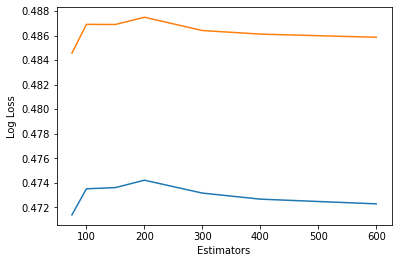

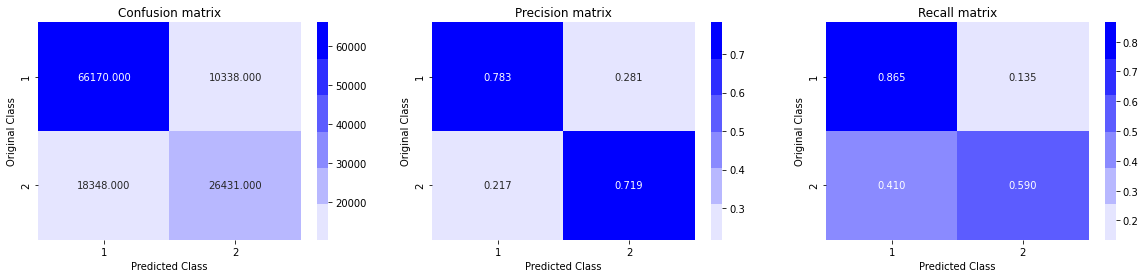

In [0]:
from sklearn.ensemble import ExtraTreesClassifier as EXC

estimators = [75,100,150,200,300,400,600]
test_scores = []
train_scores = []
for i in estimators:
    exc_clf = EXC(n_estimators=i,max_depth=12,n_jobs=-1)#low bias high variance model, as depth increases variance increases. while bagging the variance will come down automatically. n_jobs=-1 to parallalize the task into cpu cores
    exc_clf.fit(X_train_sc,y_train)
    predict_y = exc_clf.predict_proba(X_train_sc)
    log_loss_train = log_loss(y_train, predict_y, eps=1e-15)
    train_scores.append(log_loss_train)
    predict_y = exc_clf.predict_proba(X_test_sc)
    log_loss_test = log_loss(y_test, predict_y, eps=1e-15)
    test_scores.append(log_loss_test)
    print('estimators = ',i,'Train Log Loss ',log_loss_train,'Test Log Loss ',log_loss_test)
plt.plot(estimators,train_scores,label='Train Log Loss')
plt.plot(estimators,test_scores,label='Test Log Loss')
plt.xlabel('Estimators') 
plt.ylabel('Log Loss')
predicted_y =np.argmax(predict_y,axis=1)
plot_confusion_matrix(y_test, predicted_y)

# ***4.10 XgBoost(Gradient Boost Decision Tree)***

The train log loss is: 0.21439708973825558
The test log loss is: 0.31548078158479825


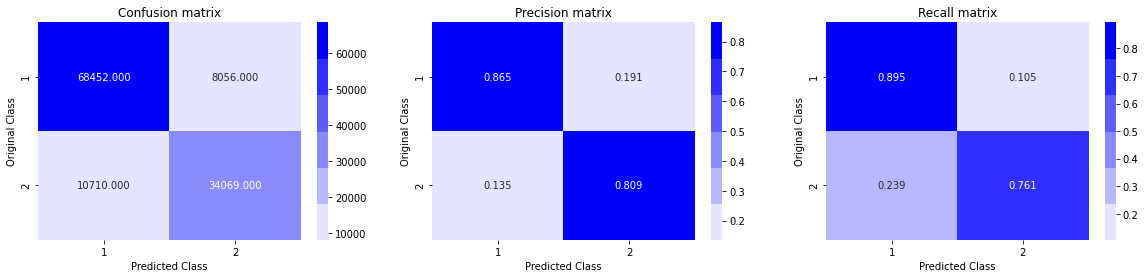

In [0]:
import xgboost as xgb
clf = xgb.XGBClassifier(max_depth=12, n_estimators=80, learning_rate=0.08, colsample_bytree=.7, gamma=0, reg_alpha=4, objective='binary:logistic', eta=0.3, silent=1, subsample=0.8)
#max_depth=3,learning_rate=0.02,n_estimators=400,n_jobs=-1, subsample=0.9, colsample_bytree=0.9
clf.fit(X_train_sc,y_train)
predict_y = clf.predict_proba(X_train_sc)
print("The train log loss is:",log_loss(y_train, predict_y, eps=1e-15))
predict_y = clf.predict_proba(X_test_sc)
print("The test log loss is:",log_loss(y_test, predict_y, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
plot_confusion_matrix(y_test, predicted_y)

# **Stacking Classifier mlextend**

The train log loss is: 0.17554446670420748
The test log loss is: 0.30372551715535057


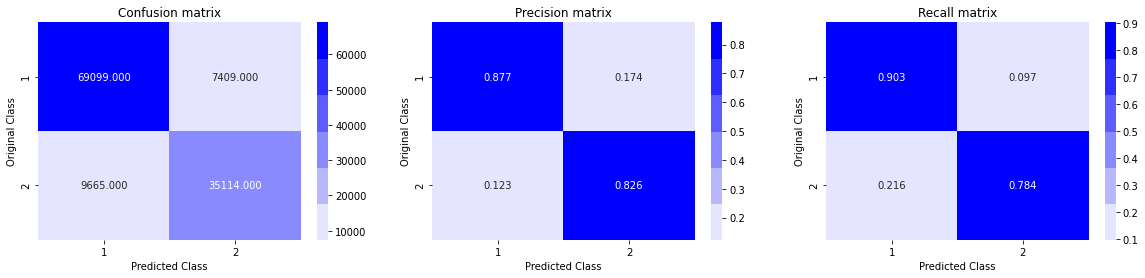

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
import xgboost as xgb

estimators = [('rf', RandomForestClassifier(n_estimators=70, max_depth=50, random_state=42)), ('sgc', SGDClassifier(alpha=10**(-5), penalty='l2', loss='hinge', random_state=42)), ('xgbc', (xgb.XGBClassifier(max_depth=12, n_estimators=80, learning_rate=0.08, colsample_bytree=.7, gamma=0, reg_alpha=4, objective='binary:logistic', eta=0.3, silent=1, subsample=0.8)))]
clf = StackingClassifier(estimators=estimators, final_estimator=SGDClassifier(alpha=10**(-5), penalty='l2', loss='log', random_state=42))
#xgb.XGBClassifier(max_depth=30, n_estimators=80, learning_rate=0.08, colsample_bytree=.7, gamma=0, reg_alpha=4, objective='binary:logistic', eta=0.3, silent=1, subsample=0.8)
#SGDClassifier(alpha=10**(-5), penalty='l2', loss='log', random_state=42)
#max_depth=3,learning_rate=0.02,n_estimators=400,n_jobs=-1, subsample=0.85, colsample_bytree=0.85
clf.fit(X_train_sc, y_train)
predict_y = clf.predict_proba(X_train_sc)
print("The train log loss is:",log_loss(y_train, predict_y, eps=1e-15))
predict_y = clf.predict_proba(X_test_sc)
print("The test log loss is:",log_loss(y_test, predict_y, eps=1e-15))
predicted_y =np.argmax(predict_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

# ***Adaptive Boosting***

The train log loss is: 0.36762172860583225
The test log loss is: 0.5228339038419201


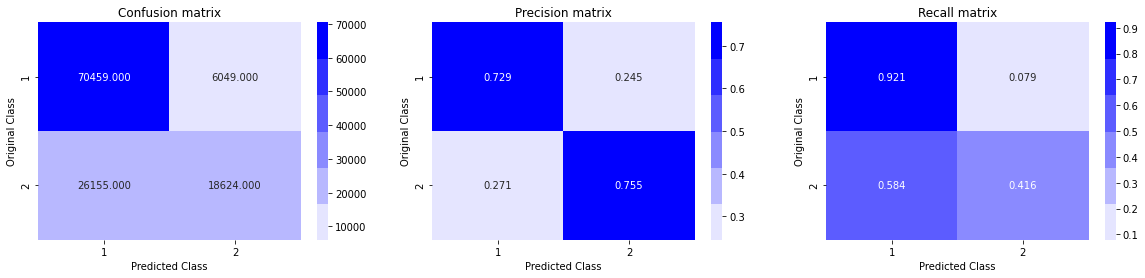

In [0]:
from sklearn.ensemble import AdaBoostClassifier as abc
abc_clf = abc(n_estimators=75, learning_rate=0.02, algorithm='SAMME.R', random_state=42)
abc_clf.fit(X_train_sc,y_train)
predict_y = clf.predict_proba(X_train_sc)
print("The train log loss is:",log_loss(y_train, predict_y, eps=1e-15))
predict_y = abc_clf.predict_proba(X_test_sc)
print("The test log loss is:",log_loss(y_test, predict_y, eps=1e-15))
predicted_y =np.argmax(predict_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

# ***5.1 With Tf-Idf features ans Converting Q1+Q2 pair as a text and then applying tfidf n gram and sentence to vectorization***

In [0]:
data.columns[0:26]

Index(['cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max',
       'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len',
       'token_set_ratio', 'token_sort_ratio', 'fuzz_ratio',
       'fuzz_partial_ratio', 'longest_substr_ratio', 'freq_qid1', 'freq_qid2',
       'q1len', 'q2len', 'q1_n_words', 'q2_n_words', 'word_Common',
       'word_Total', 'word_share', 'freq_q1+q2', 'freq_q1-q2'],
      dtype='object')

In [0]:
#prepro_features_train.csv (Simple Preprocessing Feartures)
#nlp_features_train.csv (NLP Features)
if os.path.isfile('/content/drive/My Drive/Project 4th year/QUORA VIDEO/Quora/nlp_features_train.csv'):
    dfnlp = pd.read_csv("/content/drive/My Drive/Project 4th year/QUORA VIDEO/Quora/nlp_features_train.csv",encoding='latin-1')
else:
    print("download nlp_features_train.csv from drive or run previous notebook")

if os.path.isfile('/content/drive/My Drive/Project 4th year/QUORA VIDEO/Quora/df_fe_without_preprocessing_train.csv'):
    dfppro = pd.read_csv("/content/drive/My Drive/Project 4th year/QUORA VIDEO/Quora/df_fe_without_preprocessing_train.csv",encoding='latin-1')
else:
    print("download df_fe_without_preprocessing_train.csv from drive or run previous notebook")

In [0]:
df1 = dfnlp.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)
df2 = dfppro.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)
df3 = dfnlp[['id','question1','question2']]
duplicate = dfnlp.is_duplicate

In [0]:
df1.columns

Index(['id', 'cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max',
       'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len',
       'token_set_ratio', 'token_sort_ratio', 'fuzz_ratio',
       'fuzz_partial_ratio', 'longest_substr_ratio'],
      dtype='object')

In [0]:
df2.columns

Index(['id', 'freq_qid1', 'freq_qid2', 'q1len', 'q2len', 'q1_n_words',
       'q2_n_words', 'word_Common', 'word_Total', 'word_share', 'freq_q1+q2',
       'freq_q1-q2'],
      dtype='object')

In [0]:
df3.columns

Index(['id', 'question1', 'question2'], dtype='object')

so for Tf-Idf Features i am combining question1 and question2, then getting Tf-Idf for for Train and transforming test.

In [0]:
df3 = df3.fillna(' ')
df4 = pd.DataFrame()
df4['Text'] = df3.question1 + ' ' + df3.question2
df4['id'] = df3.id

# ***Combining question1 and question2, then getting Tf-Idf***

In [0]:
df2['id']=df1['id']
df4['id']=df1['id']
df5  = df1.merge(df2, on='id',how='left')
final  = df5.merge(df4, on='id',how='left')

In [0]:
final.columns

Index(['id', 'cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max',
       'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len',
       'token_set_ratio', 'token_sort_ratio', 'fuzz_ratio',
       'fuzz_partial_ratio', 'longest_substr_ratio', 'freq_qid1', 'freq_qid2',
       'q1len', 'q2len', 'q1_n_words', 'q2_n_words', 'word_Common',
       'word_Total', 'word_share', 'freq_q1+q2', 'freq_q1-q2', 'Text'],
      dtype='object')

In [0]:
final = final.drop('id',axis=1)

In [0]:
X_train_tf,X_test_tf, y_train_tf, y_test_tf = train_test_split(final,duplicate, stratify=y_true, test_size=0.3,random_state=13)

In [0]:
tfidf_vect = TfidfVectorizer(ngram_range=(1,3),max_features=200000,min_df=0.000032)
train_tfidf = tfidf_vect.fit_transform(X_train_tf.Text)
test_tfidf = tfidf_vect.transform(X_test_tf.Text)
print('No of Tfidf features',len(tfidf_vect.get_feature_names()))

No of Tfidf features 122947


In [0]:
X_train_tf = X_train_tf.drop('Text',axis=1)
X_test_tf = X_test_tf.drop('Text',axis=1)

In [0]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train_some = scale.fit_transform(X_train_tf)
X_test_some = scale.transform(X_test_tf)

In [0]:
from scipy.sparse import hstack
X_train2 = hstack((X_train_some,train_tfidf))
X_test2 = hstack((X_test_some,test_tfidf))

# ***5.2 Logistic Regression with Log Loss***

For values of best alpha =  4.25e-06 The train log loss is: 0.31379506083860653
For values of best alpha =  4.25e-06 The test log loss is: 0.34821948078873816
Total number of data points : 121287


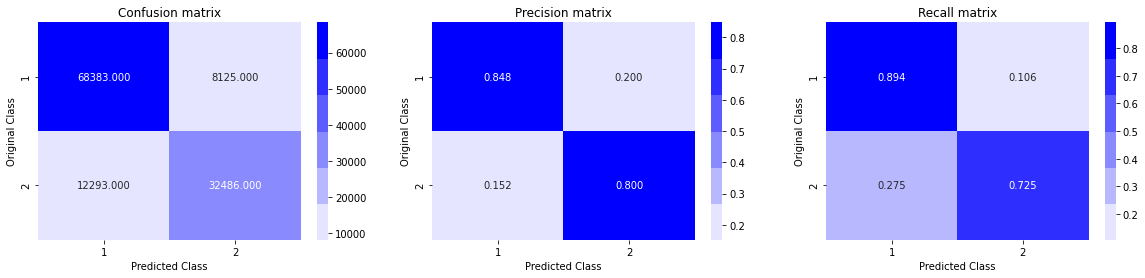

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

alpha = np.random.uniform(0.0000025,0.000035,14)
alpha = np.round(alpha,8)
alpha.sort()

log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train2, y_train)
    predict_y = sig_clf.predict_proba(X_test2)
    log_error_array.append(log_loss(y_test, predict_y, eps=1e-15))
    #print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, eps=1e-15))



best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train2, y_train)

predict_y = sig_clf.predict_proba(X_train2)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y,eps=1e-15))
predict_y = sig_clf.predict_proba(X_test2)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y,eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

# ***5.3 Another Type of Logistic Regression***

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
import numpy as np 

# 5-fold cross-validation for model tuning
logr_model = LogisticRegression(random_state=42)
param_grid = {'C': np.logspace(-2, 7, 10),
             'tol': np.logspace(-5, -1, 5)
             }
logr_cv = RandomizedSearchCV(logr_model, param_distributions=param_grid, cv=5, n_jobs=-1)
# X_train_features contains all features from feature sets 1,2 & 3 for the training set question-pairs
logr_cv.fit(X_train2, y_train)

# train the tuned model
logr_model = LogisticRegression(random_state=42, 
                                C=logr_cv.best_params_['C'], 
                                tol=logr_cv.best_params_['tol'], 
                                n_jobs=-1)
logr_model.fit(X_train2, y_train)

# predict using test set
# X_test_features contains all features from feature sets 1,2 & 3 for the test set question-pairs
logr_pred = logr_model.predict(X_test2)
print("The train log loss is:",log_loss(y_train, logr_pred, eps=1e-15))

logr_pred = logr_model.predict_proba(X_test2)
print("The test log loss is:",log_loss(y_test, logr_pred,eps=1e-15))

plot_confusion_matrix(y_test, logr_pred)


# ***5.4 Linear SVM***

For values of best alpha =  3.68e-06 The train log loss is: 0.280364457878787
For values of best alpha =  3.68e-06 The test log loss is: 0.34063592451581615
Total number of data points : 121287


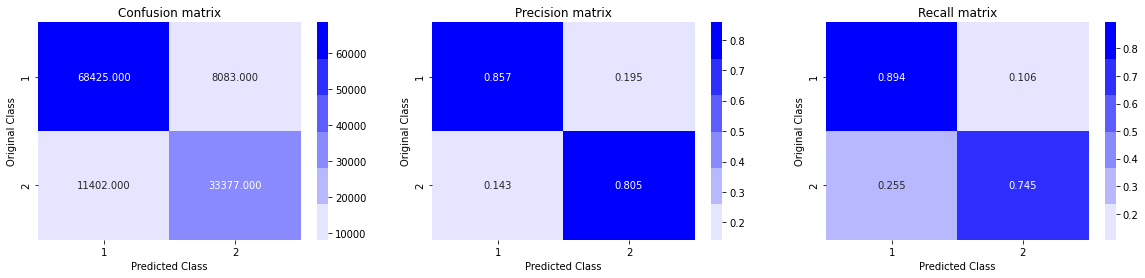

In [0]:
#alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------
alpha = np.random.uniform(0.0000025,0.000035,14)
alpha = np.round(alpha,8)
alpha.sort()

log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='hinge', random_state=42)#applying hinge loss to apply svm
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train2, y_train)
    predict_y = sig_clf.predict_proba(X_test2)
    log_error_array.append(log_loss(y_test, predict_y, eps=1e-15))
    #print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, eps=1e-15))



best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train2, y_train)

predict_y = sig_clf.predict_proba(X_train2)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y,eps=1e-15))
predict_y = sig_clf.predict_proba(X_test2)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y,eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

# ***5.5 String Kernel SVM***

In [0]:
from sklearn.svm import SVC

#class sklearn.svm.SVC(C=1.0, kernel='string', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None
str_svm_clf = SVC(C=1.0, kernel='rbf', random_state=42)
str_svm_clf.fit(X_train2, y_train)
predict_y = str_svm_clf.predict_proba(X_test2)
print("The train log loss is:",log_loss(y_train, predict_y,eps=1e-15))
predict_y = str_svm_clf.predict_proba(X_test2)
print("The test log loss is:",log_loss(y_test, predict_y,eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
plot_confusion_matrix(y_test, predicted_y)


# ***5.6 Random Forest Classifier Bagging(Row Sampling + Column Sampling)*** #

estimators =  75 Train Log Loss  0.38627838749970317 Test Log Loss  0.425890142999786
estimators =  100 Train Log Loss  0.3977075209530202 Test Log Loss  0.4345199361031034
estimators =  150 Train Log Loss  0.39097611934422044 Test Log Loss  0.4299614967175903
estimators =  200 Train Log Loss  0.39084986924127907 Test Log Loss  0.430092749136885
estimators =  300 Train Log Loss  0.39182990816079577 Test Log Loss  0.4302331918779486
estimators =  400 Train Log Loss  0.3956402701449201 Test Log Loss  0.4335946892635109
estimators =  600 Train Log Loss  0.39218691060583544 Test Log Loss  0.43040639991763113


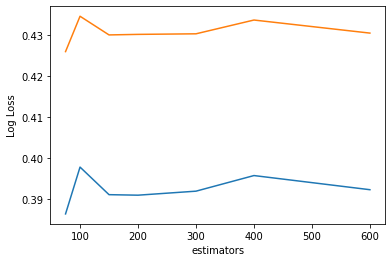

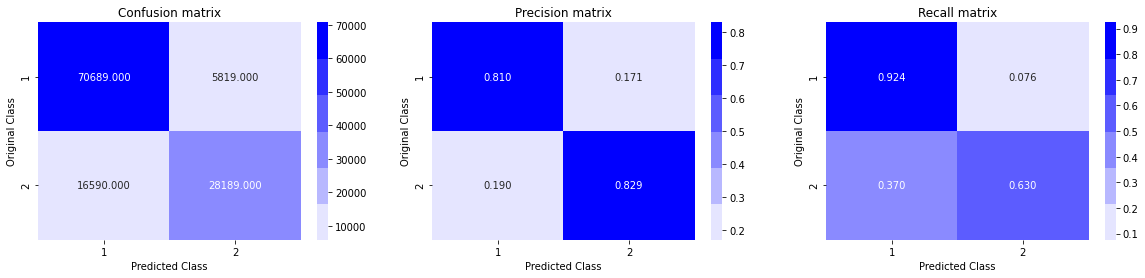

In [0]:
from sklearn.ensemble import RandomForestClassifier as RFC

estimators = [75,100,150,200,300,400,600]
test_scores = []
train_scores = []
for i in estimators:
    clf = RFC(n_estimators=i,max_depth=60,n_jobs=-1)#low bias high variance model, as depth increases variance increases. while bagging the variance will come down automatically in fact very low. n_jobs=-1 to parallalize the task into cpu cores
    #class_weight={0: 1, 1: 1.75}
    clf.fit(X_train2,y_train)
    predict_y = clf.predict_proba(X_train2)
    log_loss_train = log_loss(y_train, predict_y, eps=1e-15)
    train_scores.append(log_loss_train)
    predict_y = clf.predict_proba(X_test2)
    log_loss_test = log_loss(y_test, predict_y, eps=1e-15)
    test_scores.append(log_loss_test)
    print('estimators = ',i,'Train Log Loss ',log_loss_train,'Test Log Loss ',log_loss_test)
plt.plot(estimators,train_scores,label='Train Log Loss')
plt.plot(estimators,test_scores,label='Test Log Loss')
plt.xlabel('estimators') 
plt.ylabel('Log Loss')
predicted_y =np.argmax(predict_y,axis=1)
plot_confusion_matrix(y_test, predicted_y)

# ***5.7 Extra Tree Classifier Bagging(Row Sampling+Column Sampling+ Randomization on a thresold value)***

estimators =  75 Train Log Loss  0.5323155780509908 Test Log Loss  0.5419370343983548
estimators =  100 Train Log Loss  0.5205981636058381 Test Log Loss  0.530462165012148
estimators =  150 Train Log Loss  0.5222740056285429 Test Log Loss  0.5318522056812168
estimators =  200 Train Log Loss  0.5177881842242853 Test Log Loss  0.5275500942854437
estimators =  300 Train Log Loss  0.5234200927954243 Test Log Loss  0.5332932701040056
estimators =  400 Train Log Loss  0.5248162066457088 Test Log Loss  0.5344653474383412
estimators =  600 Train Log Loss  0.5271090379974491 Test Log Loss  0.5367490172231235


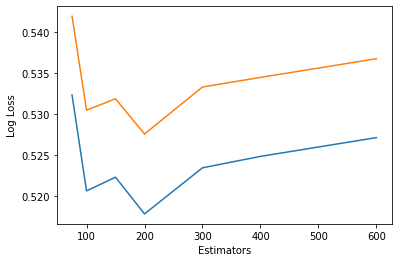

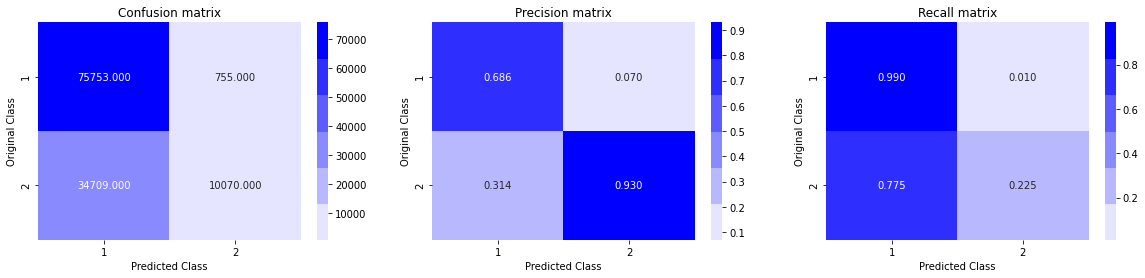

In [0]:
from sklearn.ensemble import ExtraTreesClassifier as EXC

estimators = [75,100,150,200,300,400,600]
test_scores = []
train_scores = []
for i in estimators:
    exc_clf = EXC(n_estimators=i,max_depth=60,n_jobs=-1)#low bias high variance model, as depth increases variance increases. while bagging the variance will come down automatically. n_jobs=-1 to parallalize the task into cpu cores
    exc_clf.fit(X_train2,y_train)
    predict_y = exc_clf.predict_proba(X_train2)
    log_loss_train = log_loss(y_train, predict_y, eps=1e-15)
    train_scores.append(log_loss_train)
    predict_y = exc_clf.predict_proba(X_test2)
    log_loss_test = log_loss(y_test, predict_y, eps=1e-15)
    test_scores.append(log_loss_test)
    print('estimators = ',i,'Train Log Loss ',log_loss_train,'Test Log Loss ',log_loss_test)
plt.plot(estimators,train_scores,label='Train Log Loss')
plt.plot(estimators,test_scores,label='Test Log Loss')
plt.xlabel('Estimators') 
plt.ylabel('Log Loss')
predicted_y =np.argmax(predict_y,axis=1)
plot_confusion_matrix(y_test, predicted_y)

# ***5.8 XgBoost(Gradient Boost Decision Tree)***

The train log loss is: 0.15238007032272546
The test log loss is: 0.29581610597810293


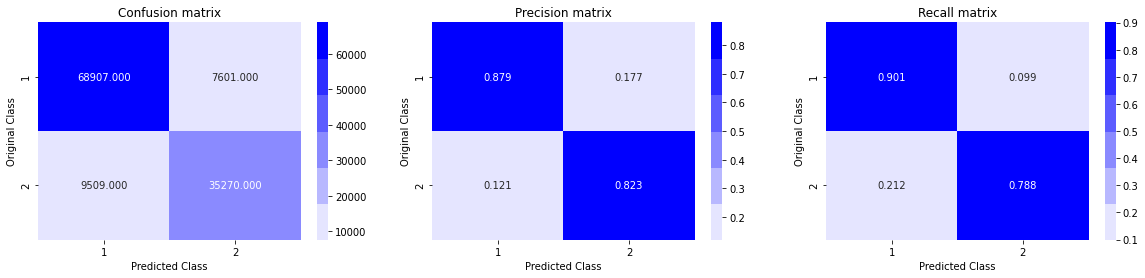

In [0]:
import xgboost as xgb
clf = xgb.XGBClassifier(max_depth=40, n_estimators=80, learning_rate=0.08, colsample_bytree=.7, gamma=0, reg_alpha=4, objective='binary:logistic', eta=0.3, silent=1, subsample=0.8)
#max_depth=3,learning_rate=0.02,n_estimators=400,n_jobs=-1, subsample=0.9, colsample_bytree=0.9
clf.fit(X_train2,y_train)
predict_y = clf.predict_proba(X_train2)
print("The train log loss is:",log_loss(y_train, predict_y, eps=1e-15))
predict_y = clf.predict_proba(X_test2)
print("The test log loss is:",log_loss(y_test, predict_y, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
plot_confusion_matrix(y_test, predicted_y)

# **5.9 Stacking Classifier MlExtend**

The train log loss is: 0.17554446670420748
The test log loss is: 0.30372551715535057


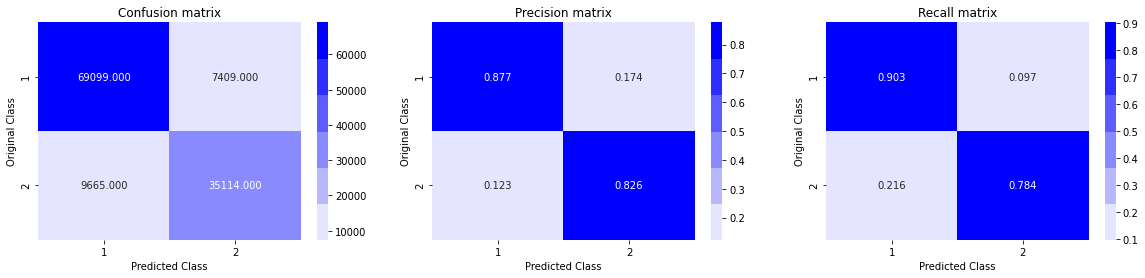

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
import xgboost as xgb

estimators = [('rf', RandomForestClassifier(n_estimators=70, max_depth=50, random_state=42)), ('sgc', SGDClassifier(alpha=10**(-5), penalty='l2', loss='hinge', random_state=42)), ('xgbc', (xgb.XGBClassifier(max_depth=30, n_estimators=80, learning_rate=0.08, colsample_bytree=.7, gamma=0, reg_alpha=4, objective='binary:logistic', eta=0.3, silent=1, subsample=0.8)))]
clf = StackingClassifier(estimators=estimators, final_estimator=SGDClassifier(alpha=10**(-5), penalty='l2', loss='log', random_state=42))
#xgb.XGBClassifier(max_depth=30, n_estimators=80, learning_rate=0.08, colsample_bytree=.7, gamma=0, reg_alpha=4, objective='binary:logistic', eta=0.3, silent=1, subsample=0.8)
#SGDClassifier(alpha=10**(-5), penalty='l2', loss='log', random_state=42)
#max_depth=3,learning_rate=0.02,n_estimators=400,n_jobs=-1, subsample=0.85, colsample_bytree=0.85
clf.fit(X_train2, y_train)
predict_y = clf.predict_proba(X_train2)
print("The train log loss is:",log_loss(y_train, predict_y, eps=1e-15))
predict_y = clf.predict_proba(X_test2)
print("The test log loss is:",log_loss(y_test, predict_y, eps=1e-15))
predicted_y =np.argmax(predict_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

The train log loss is: 0.3039419492473804
The test log loss is: 0.348878839083051


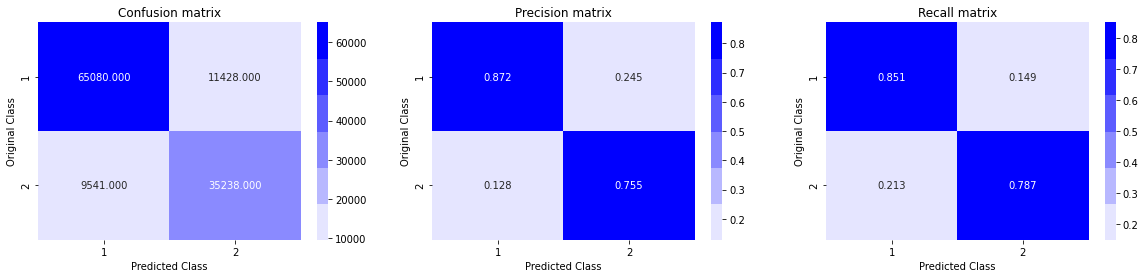

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
import xgboost as xgb

estimators = [('rf', RandomForestClassifier(n_estimators=70, max_depth=50, random_state=42)), ('sgc', SGDClassifier(alpha=10**(-5), penalty='l2', loss='hinge', random_state=42)), ('sgdc', (SGDClassifier(alpha=10**(-5), penalty='l2', loss='log', random_state=42)))]
clf = StackingClassifier(estimators=estimators, final_estimator=xgb.XGBClassifier(max_depth=30, n_estimators=80, learning_rate=0.08, colsample_bytree=.7, gamma=0, reg_alpha=4, objective='binary:logistic', eta=0.3, silent=1, subsample=0.8))
#max_depth=3,learning_rate=0.02,n_estimators=400,n_jobs=-1, subsample=0.85, colsample_bytree=0.85
clf.fit(X_train2, y_train)
predict_y = clf.predict_proba(X_train2)
print("The train log loss is:",log_loss(y_train, predict_y, eps=1e-15))
predict_y = clf.predict_proba(X_test2)
print("The test log loss is:",log_loss(y_test, predict_y, eps=1e-15))
predicted_y =np.argmax(predict_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

# ***5.10 Adaptive Boosting***

The train log loss is: 0.36762172860583225
The test log loss is: 0.5228339038419201


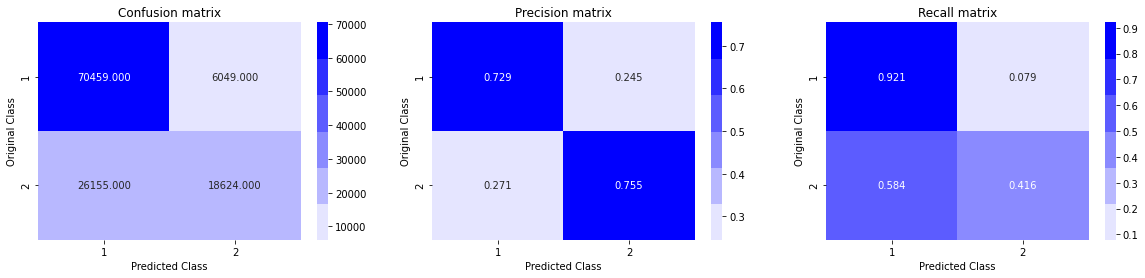

In [0]:
from sklearn.ensemble import AdaBoostClassifier as abc
abc_clf = abc(n_estimators=75, learning_rate=0.02, algorithm='SAMME.R', random_state=42)
abc_clf.fit(X_train2,y_train)
predict_y = clf.predict_proba(X_train2)
print("The train log loss is:",log_loss(y_train, predict_y, eps=1e-15))
predict_y = abc_clf.predict_proba(X_test2)
print("The test log loss is:",log_loss(y_test, predict_y, eps=1e-15))
predicted_y =np.argmax(predict_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)